In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import datetime
now = datetime.datetime.now

# %% Own modules
from Task1 import data as ld
from Task1 import core_naive_RNN as rnn
from Task2 import maxwell_1 as maxwell_1
from Task2 import maxwell_2 as maxwell_2
from Task3 import gsm as gsm

In [32]:

model_Rnn = rnn.main()
model_maxwell_1 = maxwell_1.main()
model_maxwell_2 = maxwell_2.main()
model_gsm = gsm.main()




In [49]:
E_infty = 0.5
E = 2
eta = 1

omegas = [2]
As = [2]

n = 100
eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)

Epoch 1/8000
1/1 - 1s - loss: 5.5558 - 974ms/epoch - 974ms/step
Epoch 2/8000
1/1 - 0s - loss: 5.4431 - 10ms/epoch - 10ms/step
Epoch 3/8000
1/1 - 0s - loss: 5.3393 - 13ms/epoch - 13ms/step
Epoch 4/8000
1/1 - 0s - loss: 5.2440 - 13ms/epoch - 13ms/step
Epoch 5/8000
1/1 - 0s - loss: 5.1566 - 13ms/epoch - 13ms/step
Epoch 6/8000
1/1 - 0s - loss: 5.0763 - 12ms/epoch - 12ms/step
Epoch 7/8000
1/1 - 0s - loss: 5.0021 - 14ms/epoch - 14ms/step
Epoch 8/8000
1/1 - 0s - loss: 4.9329 - 14ms/epoch - 14ms/step
Epoch 9/8000
1/1 - 0s - loss: 4.8679 - 12ms/epoch - 12ms/step
Epoch 10/8000
1/1 - 0s - loss: 4.8060 - 10ms/epoch - 10ms/step
Epoch 11/8000
1/1 - 0s - loss: 4.7466 - 9ms/epoch - 9ms/step
Epoch 12/8000
1/1 - 0s - loss: 4.6889 - 14ms/epoch - 14ms/step
Epoch 13/8000
1/1 - 0s - loss: 4.6326 - 13ms/epoch - 13ms/step
Epoch 14/8000
1/1 - 0s - loss: 4.5772 - 11ms/epoch - 11ms/step
Epoch 15/8000
1/1 - 0s - loss: 4.5223 - 10ms/epoch - 10ms/step
Epoch 16/8000
1/1 - 0s - loss: 4.4677 - 13ms/epoch - 13ms/step
E

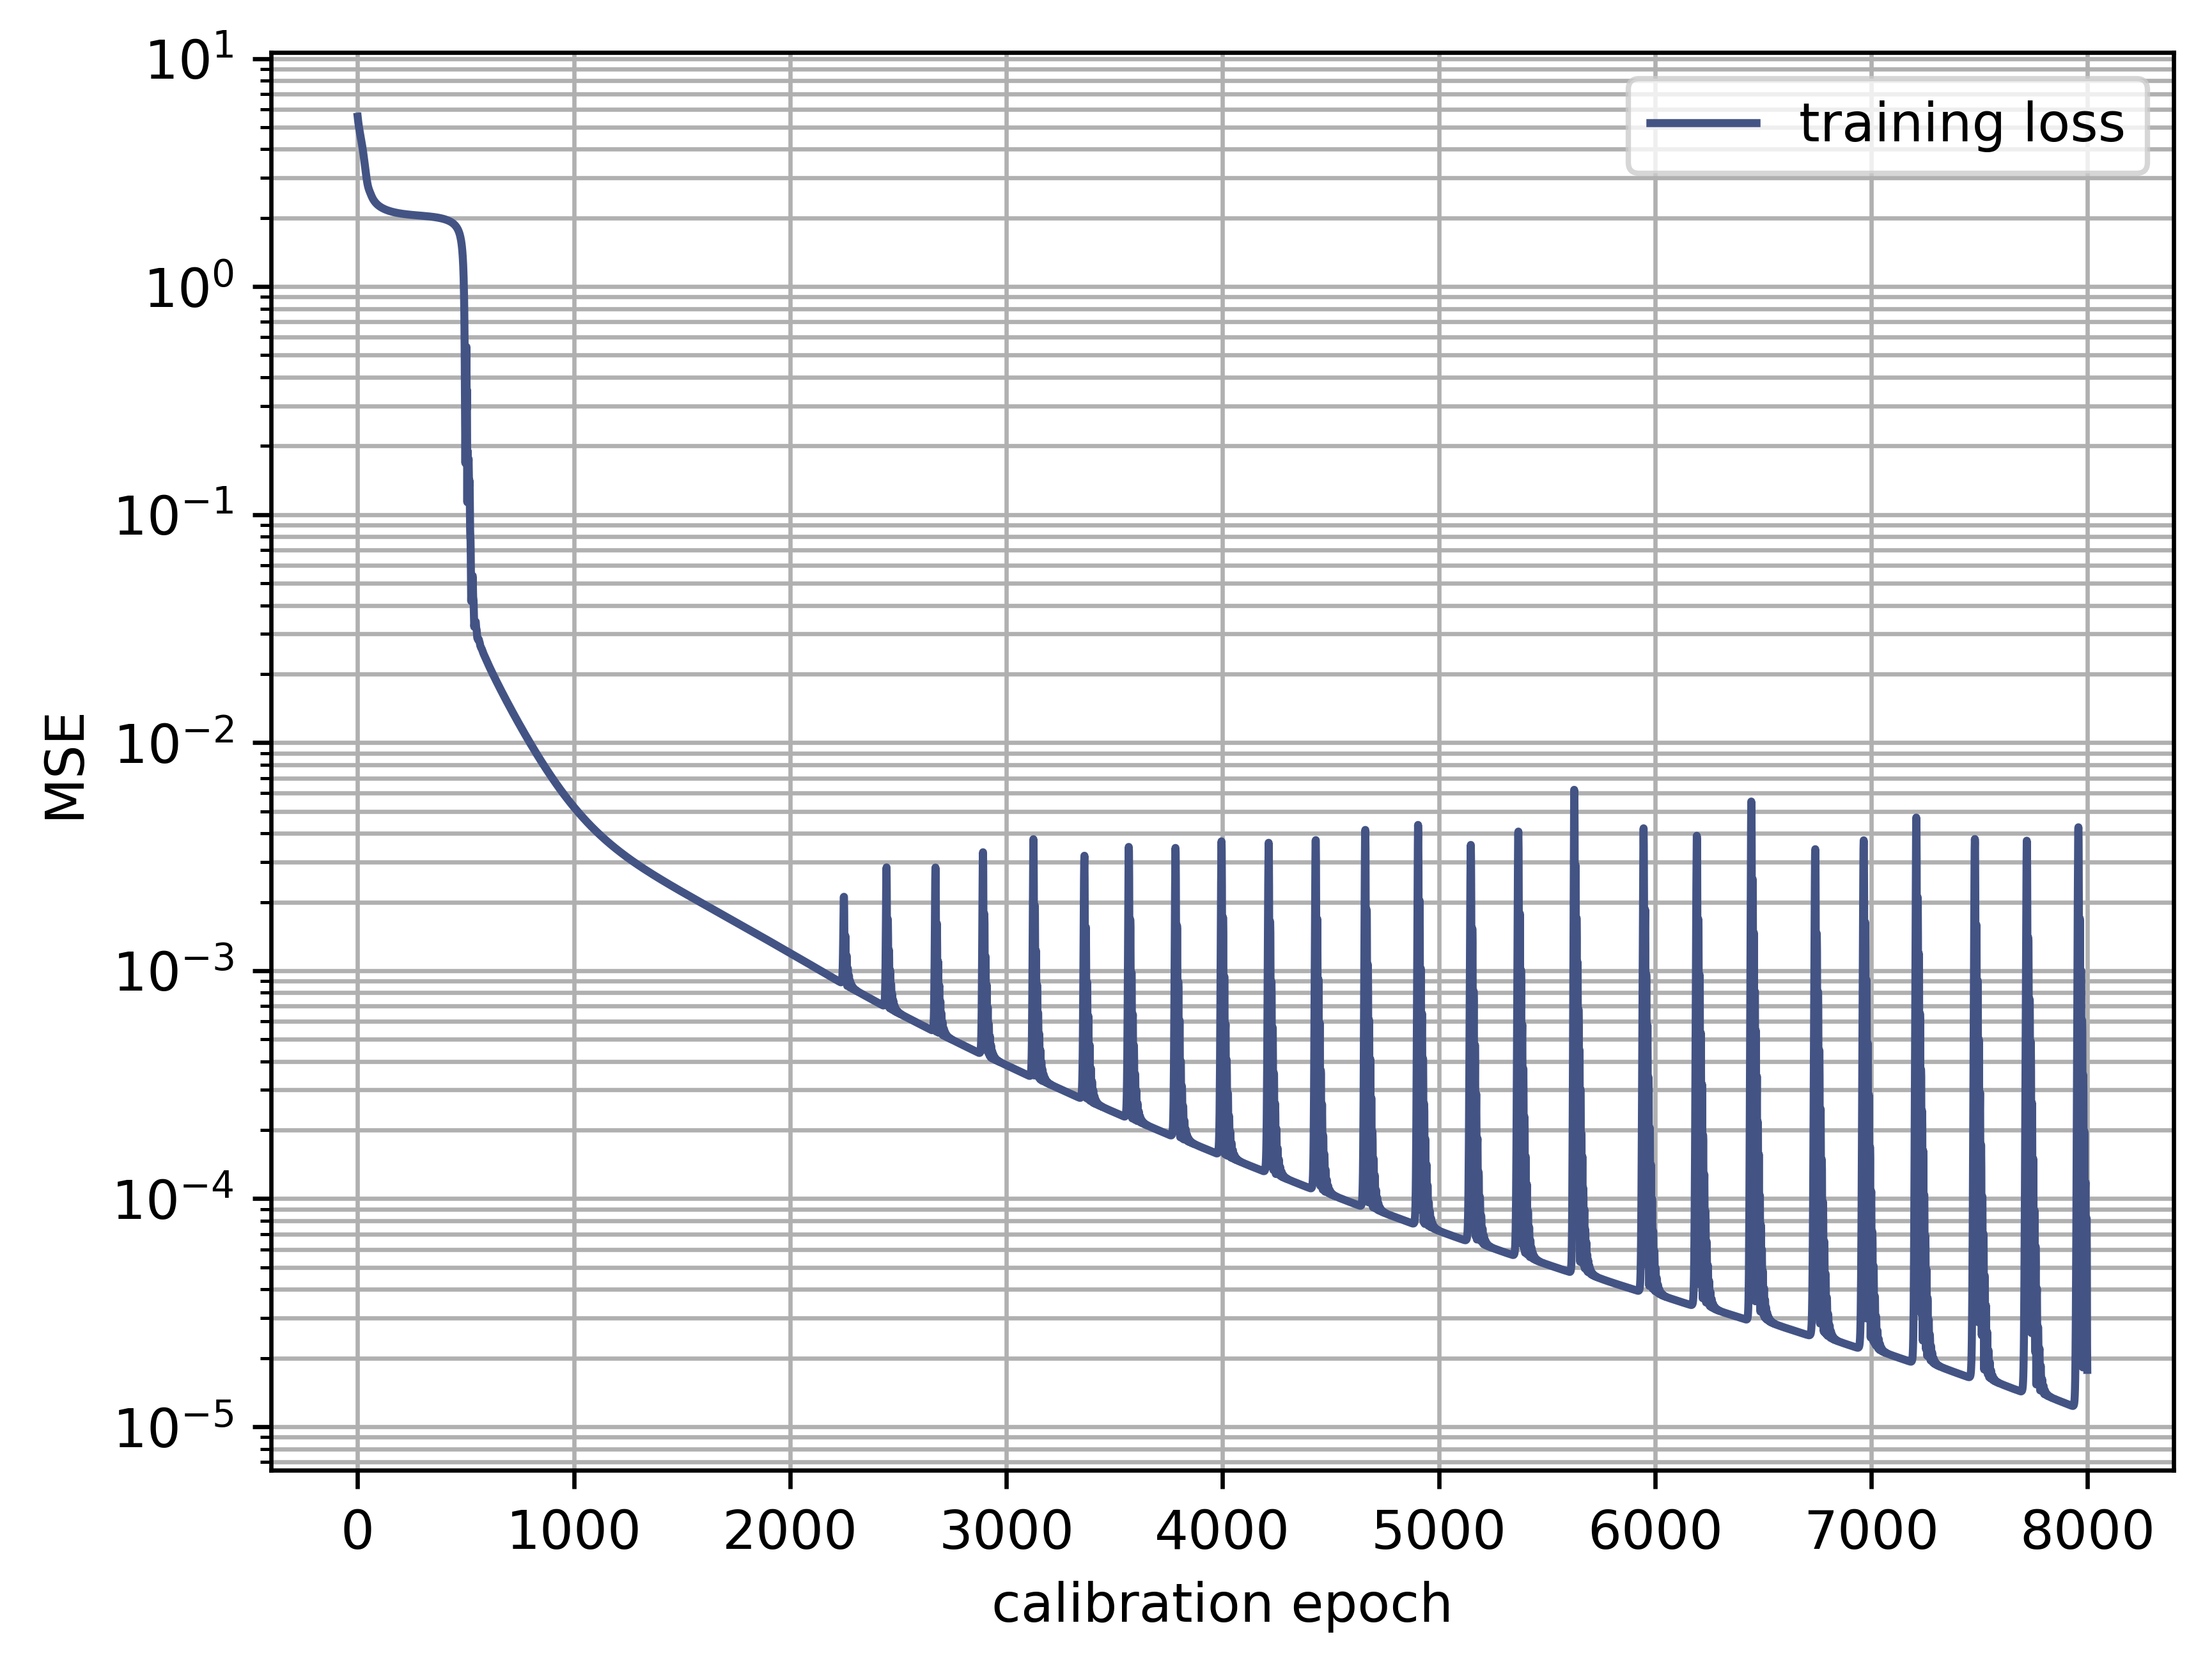

In [34]:

t1 = now()
tf.keras.backend.set_value(model_Rnn.optimizer.learning_rate, 0.002)
h1 = model_Rnn.fit([eps, dts], [sig], epochs = 8000,  verbose = 2)
t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model_rnn')
plt.figure(1, dpi=600)
plt.semilogy(h1.history['loss'], label='training loss', color=(67/255, 83/255, 132/255))
plt.grid(which='both')
plt.xlabel('calibration epoch')
plt.ylabel('MSE')
plt.legend()




Epoch 1/8000
1/1 - 2s - loss: 53.9351 - 2s/epoch - 2s/step
Epoch 2/8000
1/1 - 0s - loss: 48.7703 - 16ms/epoch - 16ms/step
Epoch 3/8000
1/1 - 0s - loss: 43.9786 - 16ms/epoch - 16ms/step
Epoch 4/8000
1/1 - 0s - loss: 39.5435 - 18ms/epoch - 18ms/step
Epoch 5/8000
1/1 - 0s - loss: 35.4494 - 24ms/epoch - 24ms/step
Epoch 6/8000
1/1 - 0s - loss: 31.6816 - 18ms/epoch - 18ms/step
Epoch 7/8000
1/1 - 0s - loss: 28.2255 - 16ms/epoch - 16ms/step
Epoch 8/8000
1/1 - 0s - loss: 25.0668 - 22ms/epoch - 22ms/step
Epoch 9/8000
1/1 - 0s - loss: 22.1916 - 16ms/epoch - 16ms/step
Epoch 10/8000
1/1 - 0s - loss: 19.5863 - 18ms/epoch - 18ms/step
Epoch 11/8000
1/1 - 0s - loss: 17.2378 - 17ms/epoch - 17ms/step
Epoch 12/8000
1/1 - 0s - loss: 15.1334 - 24ms/epoch - 24ms/step
Epoch 13/8000
1/1 - 0s - loss: 13.2605 - 15ms/epoch - 15ms/step
Epoch 14/8000
1/1 - 0s - loss: 11.6072 - 19ms/epoch - 19ms/step
Epoch 15/8000
1/1 - 0s - loss: 10.1615 - 18ms/epoch - 18ms/step
Epoch 16/8000
1/1 - 0s - loss: 8.9116 - 22ms/epoch - 

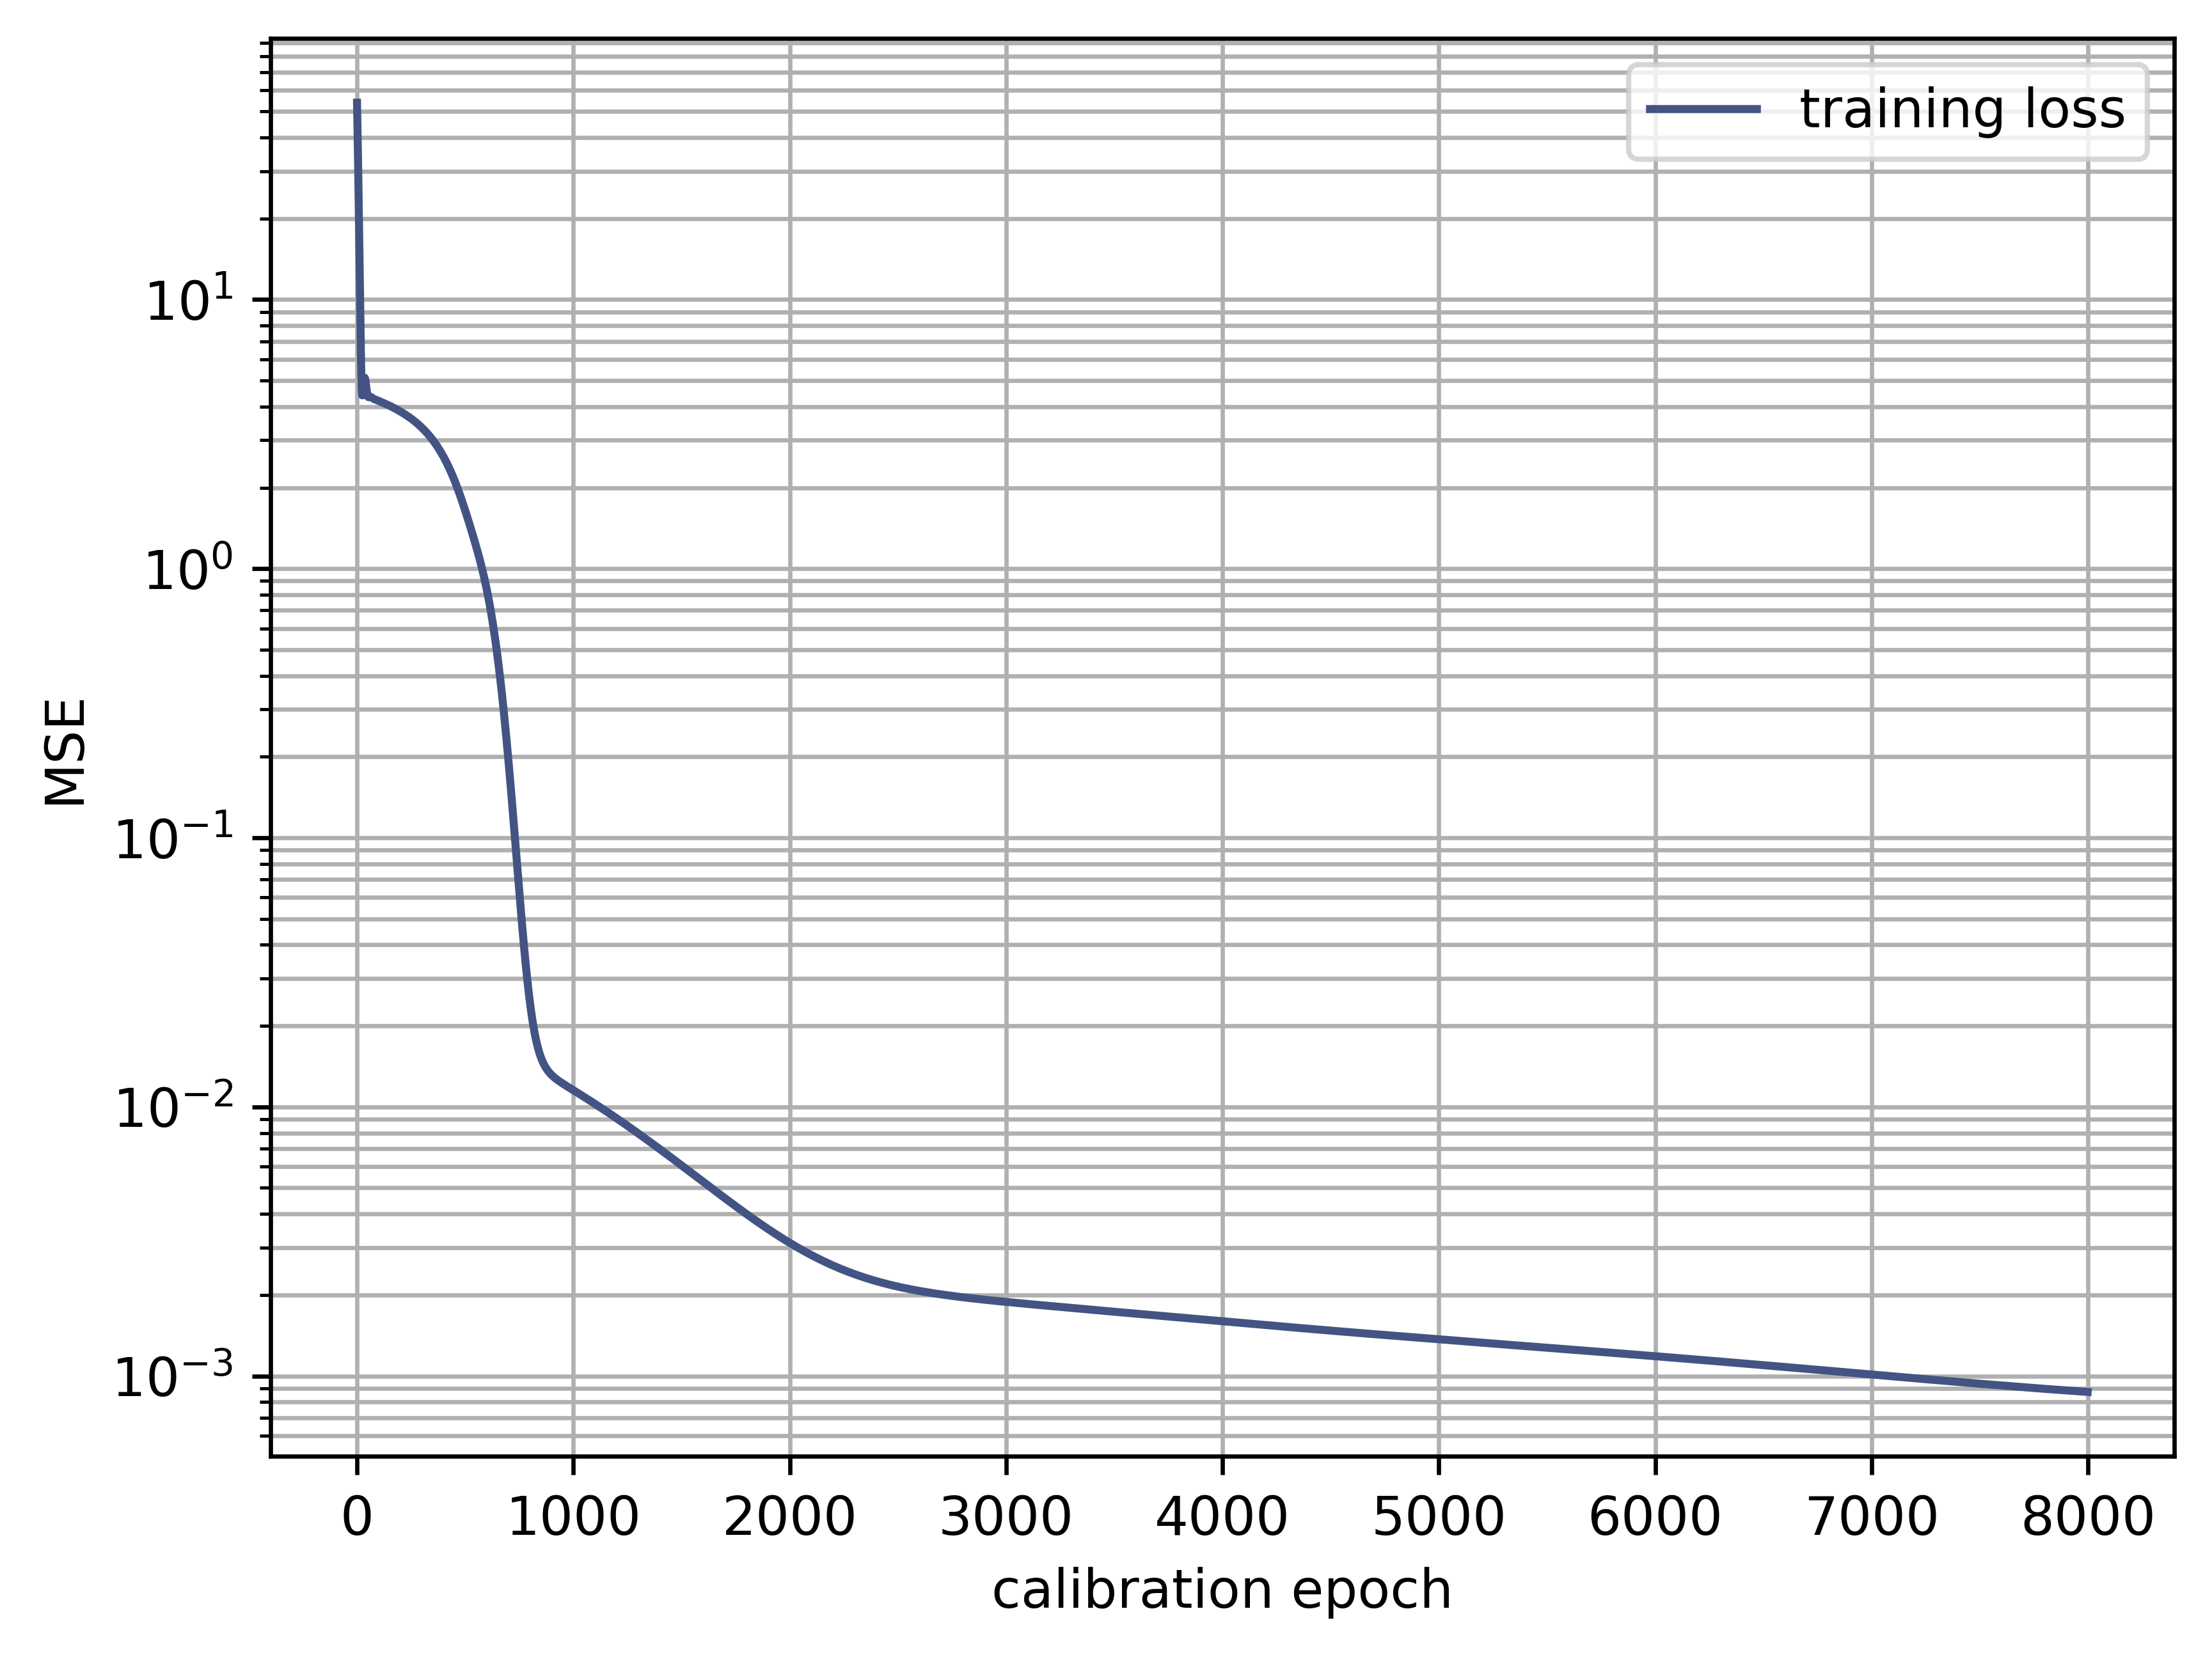

In [55]:
model_maxwell_2 = maxwell_2.main()
t1 = now()
h2 = model_maxwell_2.fit([eps, dts], [sig], epochs = 8000,  verbose = 2)
t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model_maxwell_1')

plt.figure(1, dpi=600)
plt.semilogy(h2.history['loss'], label='training loss', color=(67/255, 83/255, 132/255))
plt.grid(which='both')
plt.xlabel('calibration epoch')
plt.ylabel('MSE')
plt.legend()

Epoch 1/5000
1/1 - 3s - loss: 6.0487 - mae: 2.1889 - 3s/epoch - 3s/step
Epoch 2/5000
1/1 - 0s - loss: 6.0421 - mae: 2.1877 - 50ms/epoch - 50ms/step
Epoch 3/5000
1/1 - 0s - loss: 6.0356 - mae: 2.1865 - 46ms/epoch - 46ms/step
Epoch 4/5000
1/1 - 0s - loss: 6.0290 - mae: 2.1853 - 42ms/epoch - 42ms/step
Epoch 5/5000
1/1 - 0s - loss: 6.0225 - mae: 2.1841 - 43ms/epoch - 43ms/step
Epoch 6/5000
1/1 - 0s - loss: 6.0159 - mae: 2.1829 - 40ms/epoch - 40ms/step
Epoch 7/5000
1/1 - 0s - loss: 6.0093 - mae: 2.1816 - 47ms/epoch - 47ms/step
Epoch 8/5000
1/1 - 0s - loss: 6.0027 - mae: 2.1804 - 44ms/epoch - 44ms/step
Epoch 9/5000
1/1 - 0s - loss: 5.9960 - mae: 2.1791 - 42ms/epoch - 42ms/step
Epoch 10/5000
1/1 - 0s - loss: 5.9892 - mae: 2.1778 - 39ms/epoch - 39ms/step
Epoch 11/5000
1/1 - 0s - loss: 5.9823 - mae: 2.1765 - 46ms/epoch - 46ms/step
Epoch 12/5000
1/1 - 0s - loss: 5.9753 - mae: 2.1751 - 40ms/epoch - 40ms/step
Epoch 13/5000
1/1 - 0s - loss: 5.9681 - mae: 2.1737 - 41ms/epoch - 41ms/step
Epoch 14/500

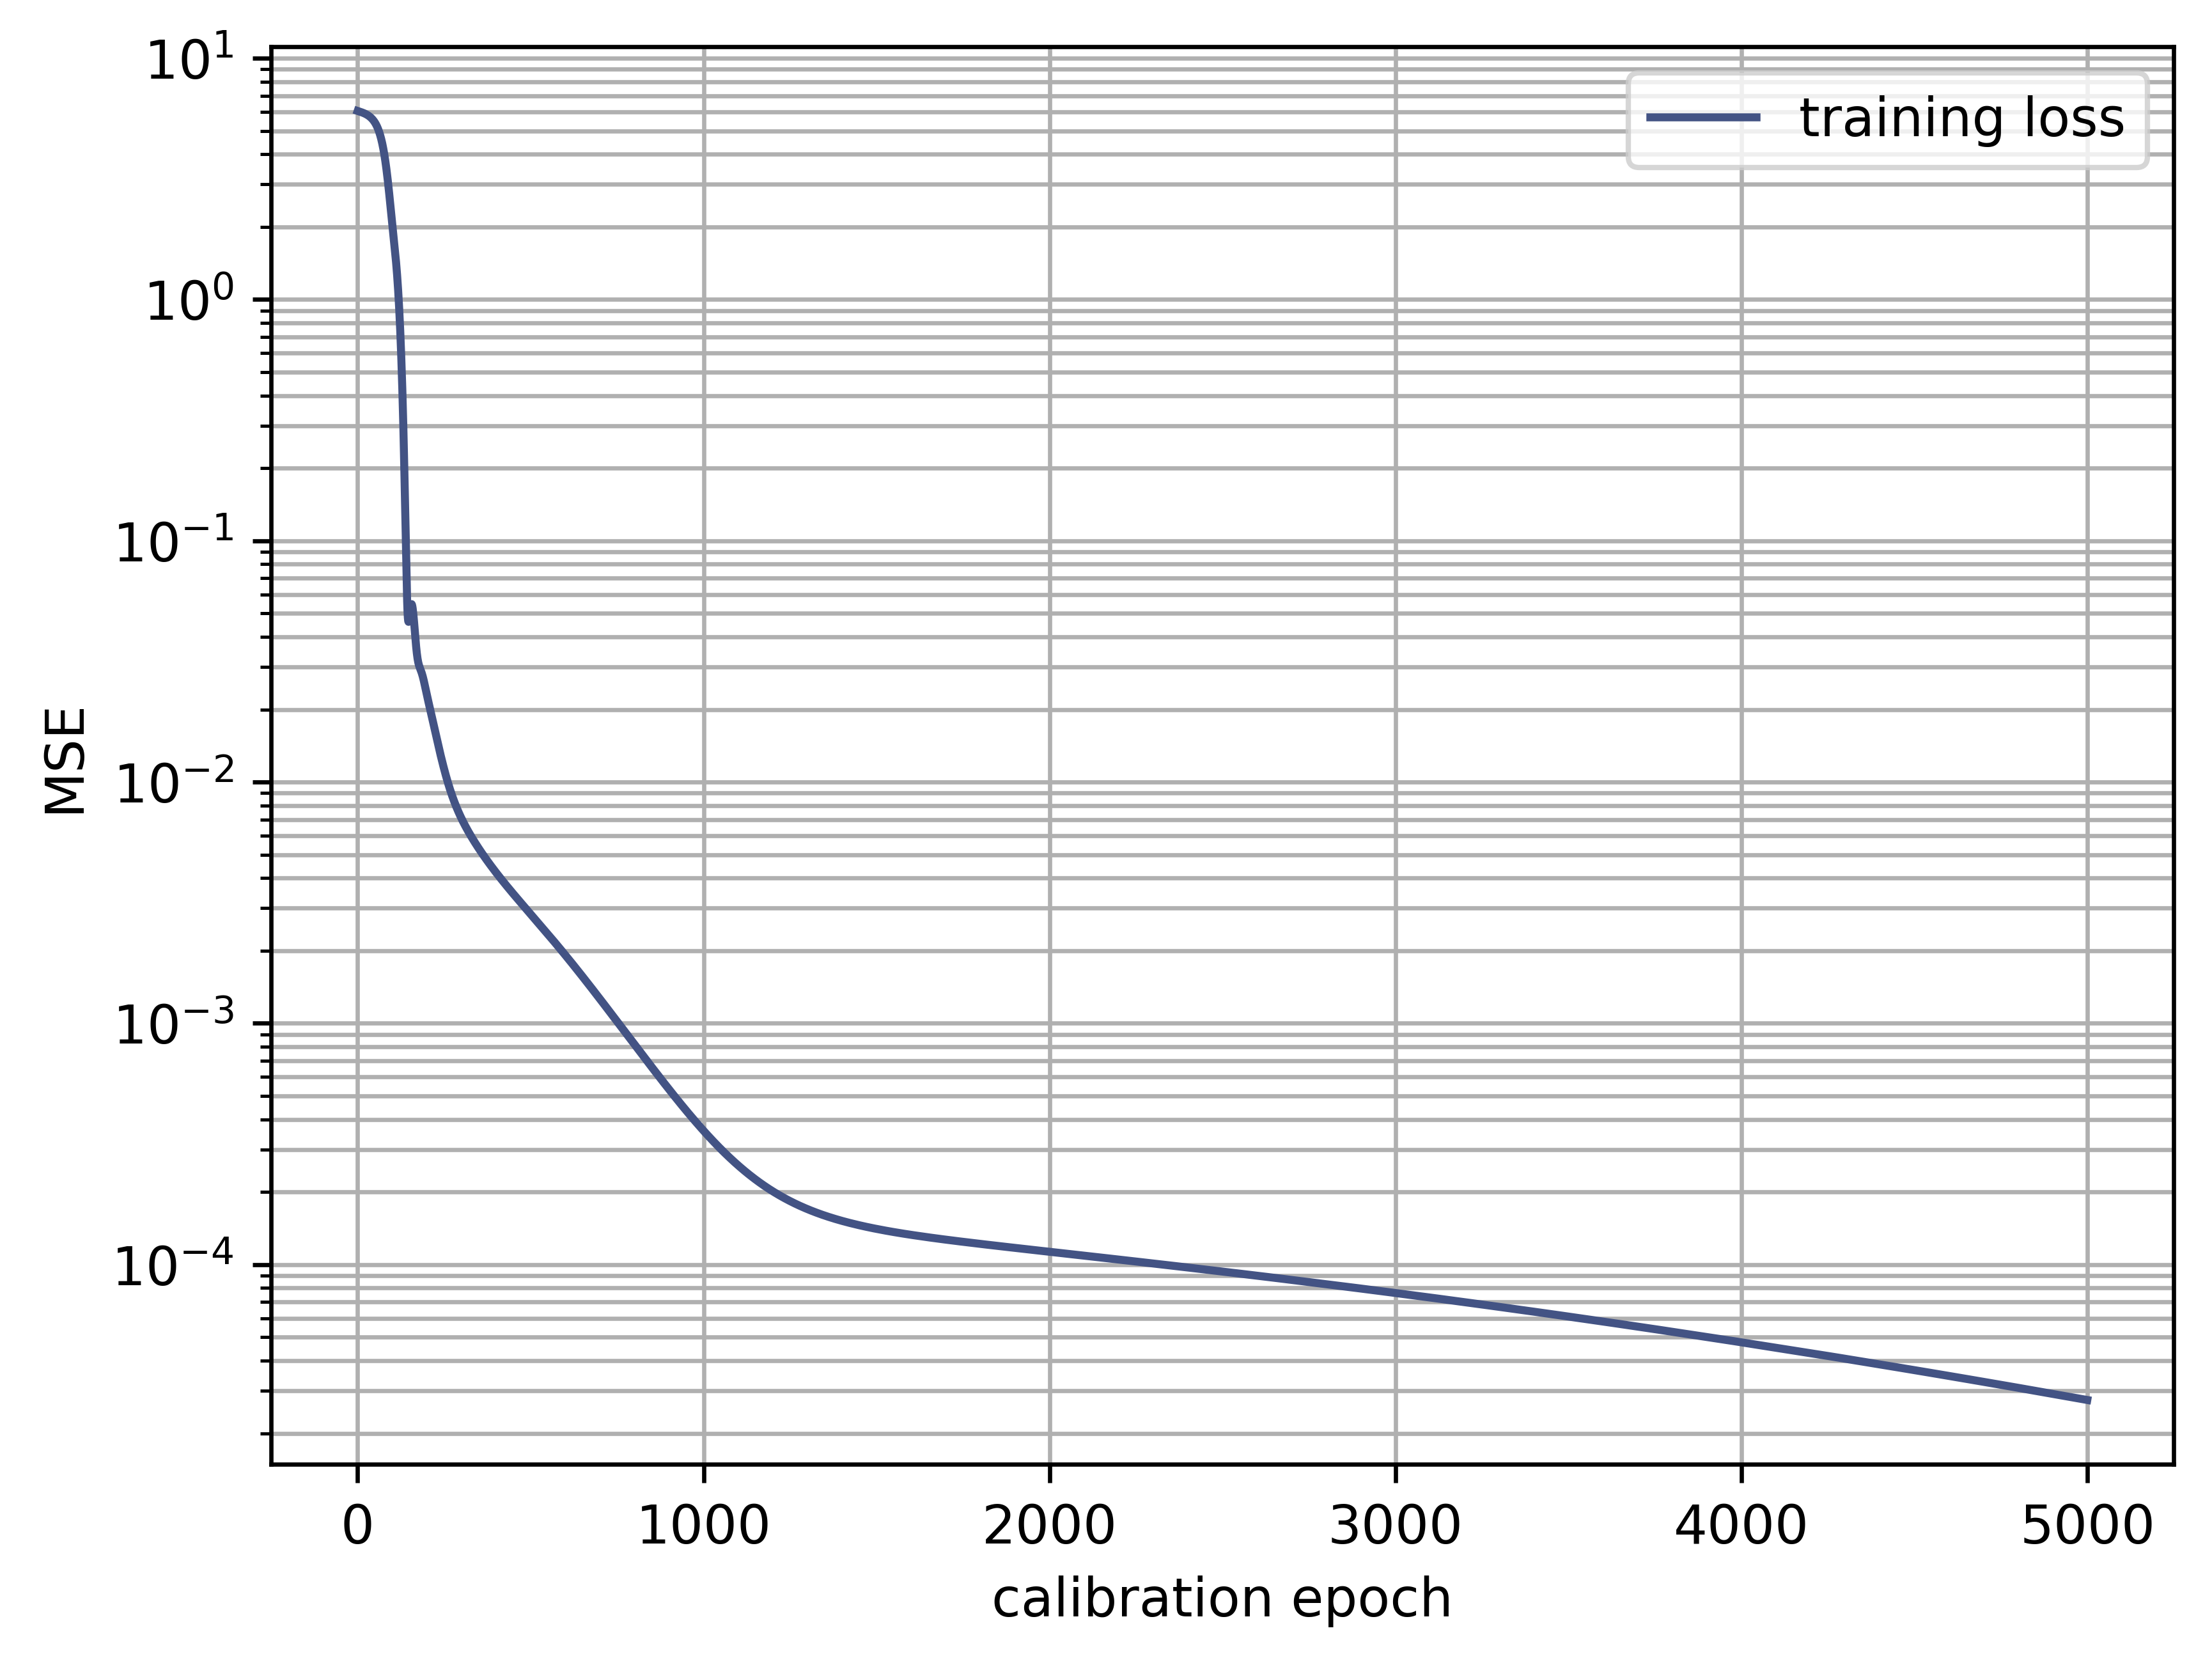

In [42]:
t1 = now()

h4 = model_gsm.fit([eps, dts], [sig], epochs = 5000,  verbose = 2)
t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model_gsm')
plt.figure(1, dpi=600)
plt.semilogy(h4.history['loss'], label='training loss', color=(67/255, 83/255, 132/255))
plt.grid(which='both')
plt.xlabel('calibration epoch')
plt.ylabel('MSE')
plt.legend()

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_model_pred(eps, sig, sig_m1, sig_m2, sig_m3, omegas, As):
    """
    Plots the experimental stress-strain data and three different model predictions.

    Parameters:
    eps : list of arrays
        Strain values for different test cases.
    sig : list of arrays
        Measured stress values corresponding to eps.
    sig_m1, sig_m2, sig_m3 : list of arrays
        Predicted stress values from three different models.
    omegas : list
        Frequency values for the legend.
    As : list
        Amplitude values for the legend.
    colors : list
        List of colors for different cases.
    """
    
    n = len(eps[0])
    ns = np.linspace(0, 2*np.pi, n)

    # 定义模型专属颜色
    model_colors = {'RNN': 'blue', 'Maxwell_2': 'green', 'GSM': '#9467bd'}
    
    plt.figure(dpi=600, figsize=(12, 5))
    
    # 第一幅子图：时间-应力曲线
    plt.subplot(1, 2, 1)
    plt.title('Data: dashed line, model prediction: continuous line')
    
    for i in range(len(eps)):
        # 真实数据使用不同的颜色
        plt.plot(ns, sig[i], linestyle='--', color='red', label=f'$\\omega$: {omegas[i]:.2f}, $A$: {As[i]:.2f}')
        # 各模型使用固定颜色
        plt.plot(ns, sig_m1[i], linestyle='-', color=model_colors['RNN'], alpha=0.8, label="Model RNN" if i == 0 else "")
        plt.plot(ns, sig_m2[i], linestyle='-', color=model_colors['Maxwell_2'], alpha=0.8, label="Model Maxwell_2" if i == 0 else "")
        plt.plot(ns, sig_m3[i], linestyle='-', color=model_colors['GSM'], alpha=0.8, label="Model GSM" if i == 0 else "")
    
    plt.xlim([0, 2*np.pi])
    plt.ylabel('Stress $\\sigma$')
    plt.xlabel('Time $t$')
    plt.legend()
    
    # 第二幅子图：应变-应力曲线
    plt.subplot(1, 2, 2)
    plt.title('Strain-Stress Comparison')
    
    for i in range(len(eps)):
        # 真实数据使用不同的颜色
        plt.plot(eps[i], sig[i], linestyle='--', color='red')
        # 各模型使用固定颜色
        plt.plot(eps[i], sig_m1[i], linestyle='-', color=model_colors['RNN'], alpha=0.8)
        plt.plot(eps[i], sig_m2[i], linestyle='-', color=model_colors['Maxwell_2'], alpha=0.8)
        plt.plot(eps[i], sig_m3[i], linestyle='-', color=model_colors['GSM'], alpha=0.8)
    
    plt.xlabel('Strain $\\varepsilon$')
    plt.ylabel('Stress $\\sigma$')

    plt.tight_layout()
    plt.show()


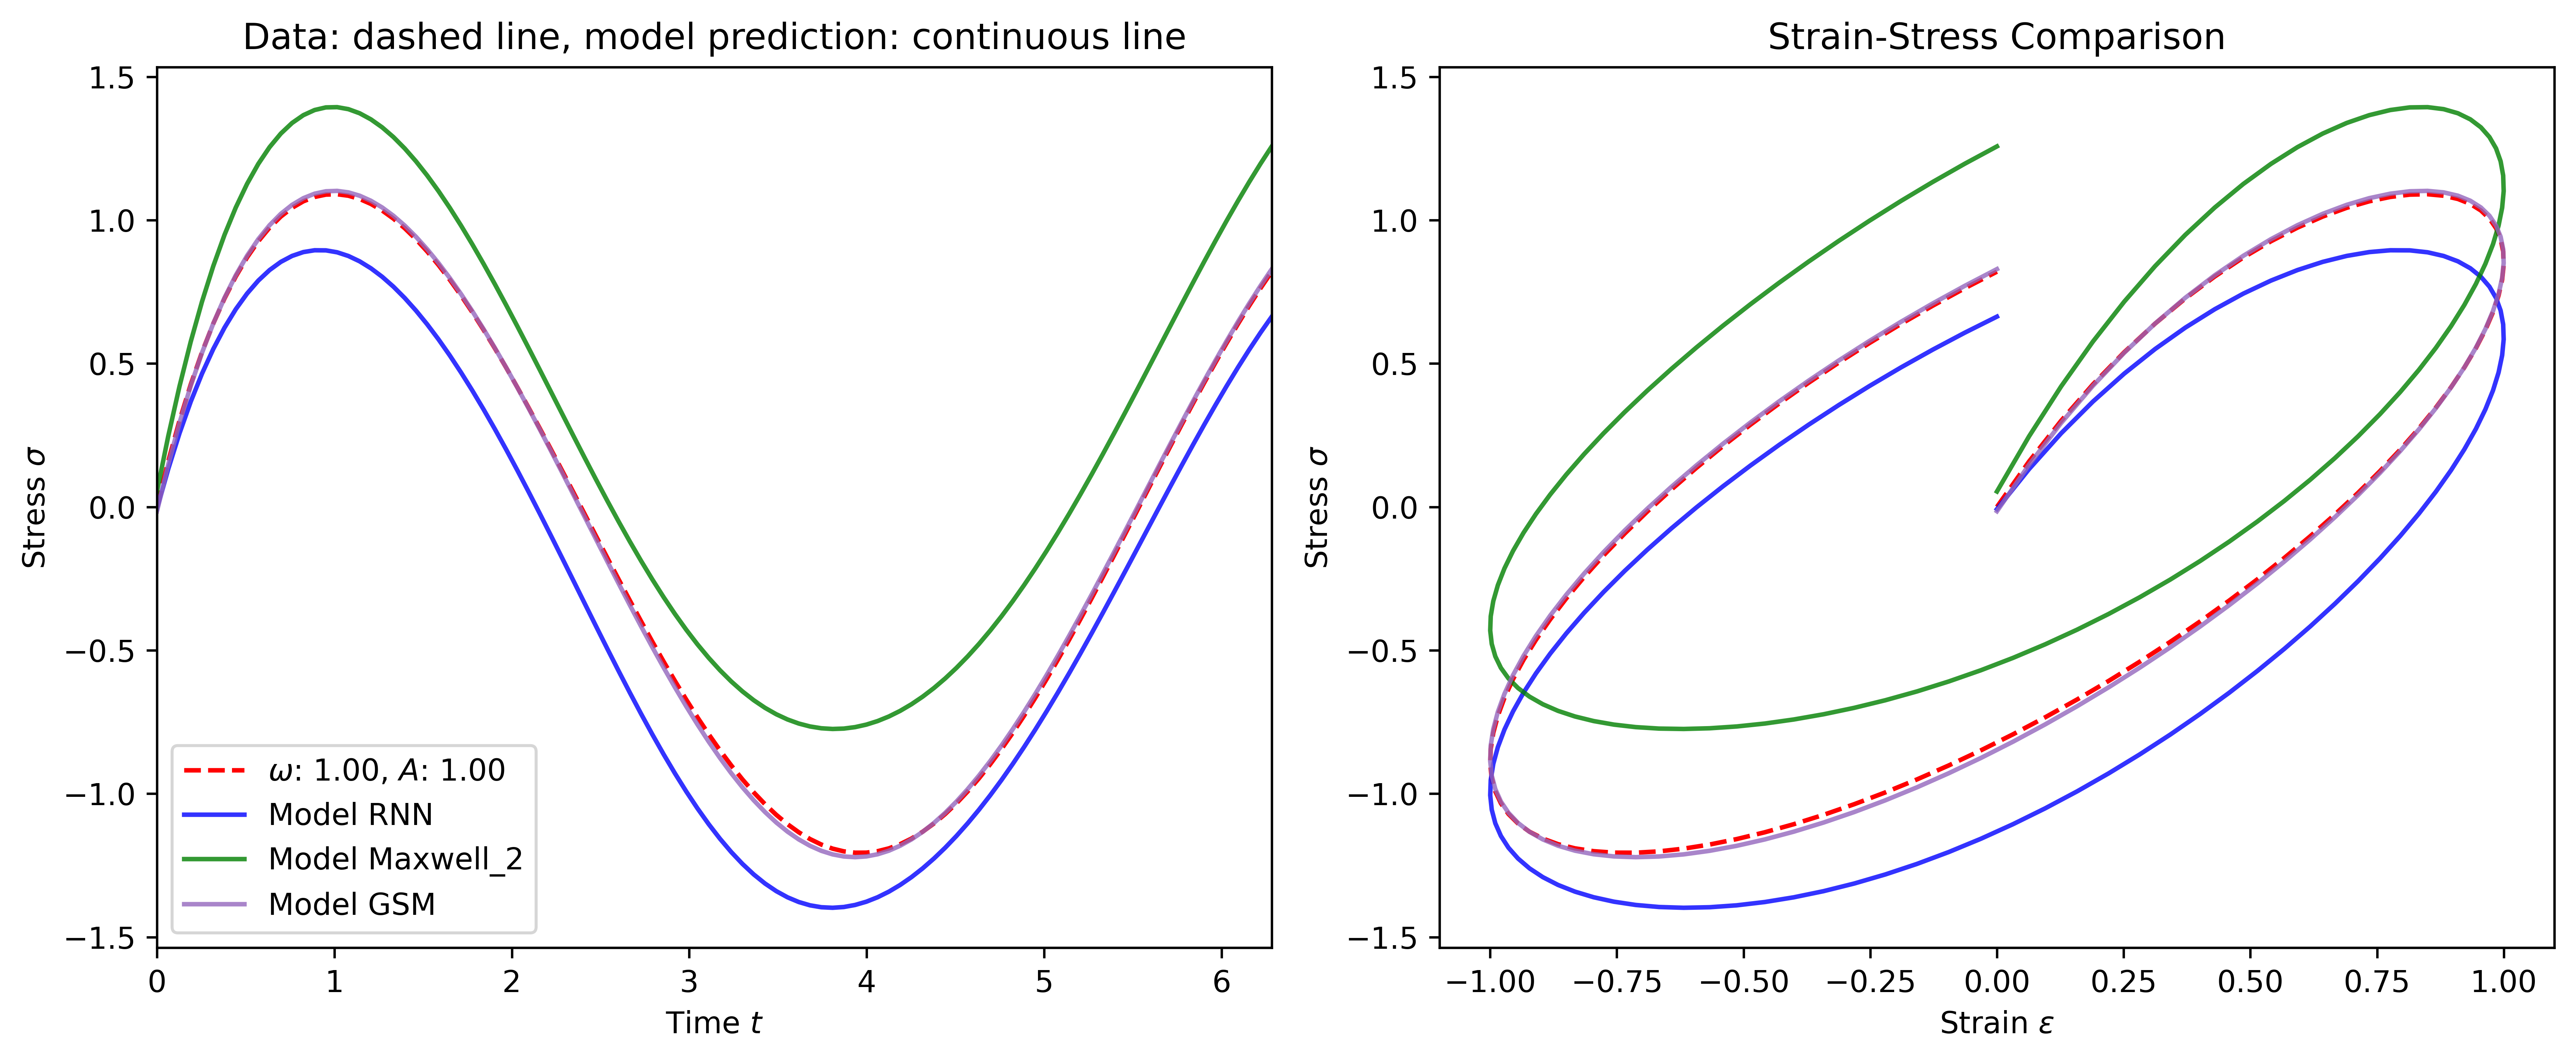

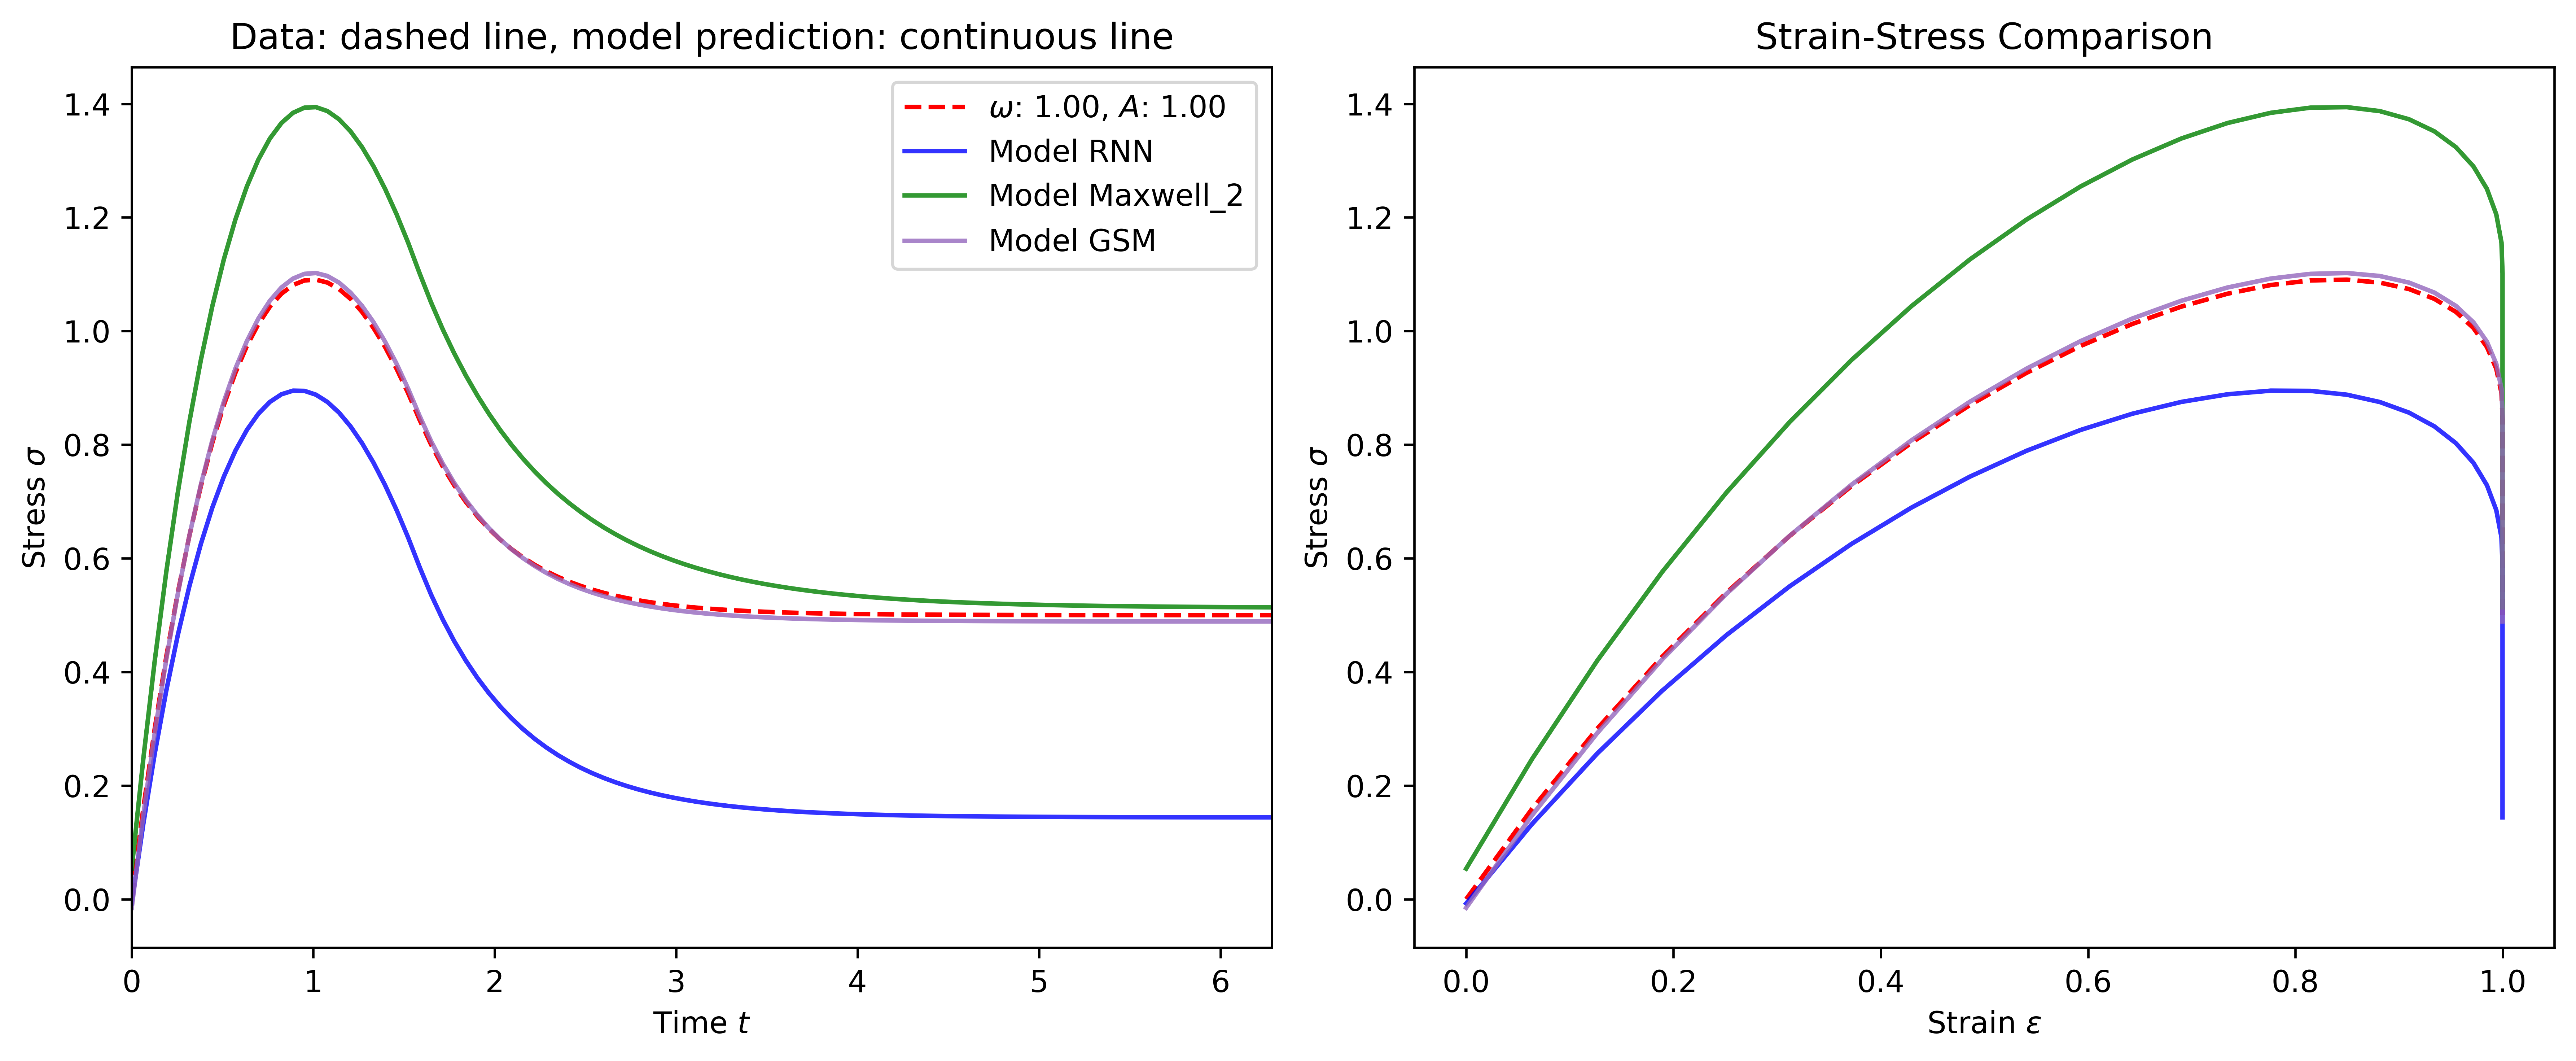

In [56]:
As = [1]
omegas = [1]

eps_harmonic, eps_dot_harmonic, sig_harmonic, dts_harmonic = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)
sig_m_rnn = model_Rnn([eps_harmonic, dts_harmonic])
sig_m_maxwell_2 = model_maxwell_2([eps_harmonic, dts_harmonic])
sig_m_gsm = model_gsm([eps_harmonic, dts_harmonic])
plot_model_pred(eps_harmonic, sig_harmonic, sig_m_rnn, sig_m_maxwell_2, sig_m_gsm, omegas, As)



eps_relaxation, eps_dot_relaxation, sig_relaxation, dts_relaxation = ld.generate_data_relaxation(E_infty, E, eta, n, omegas, As)
sig_m_rnn = model_Rnn([eps_relaxation, dts_relaxation])
sig_m_maxwell_2 = model_maxwell_2([eps_relaxation, dts_relaxation])
sig_m_gsm = model_gsm([eps_relaxation, dts_relaxation])
plot_model_pred(eps_relaxation, sig_relaxation, sig_m_rnn, sig_m_maxwell_2, sig_m_gsm, omegas, As)



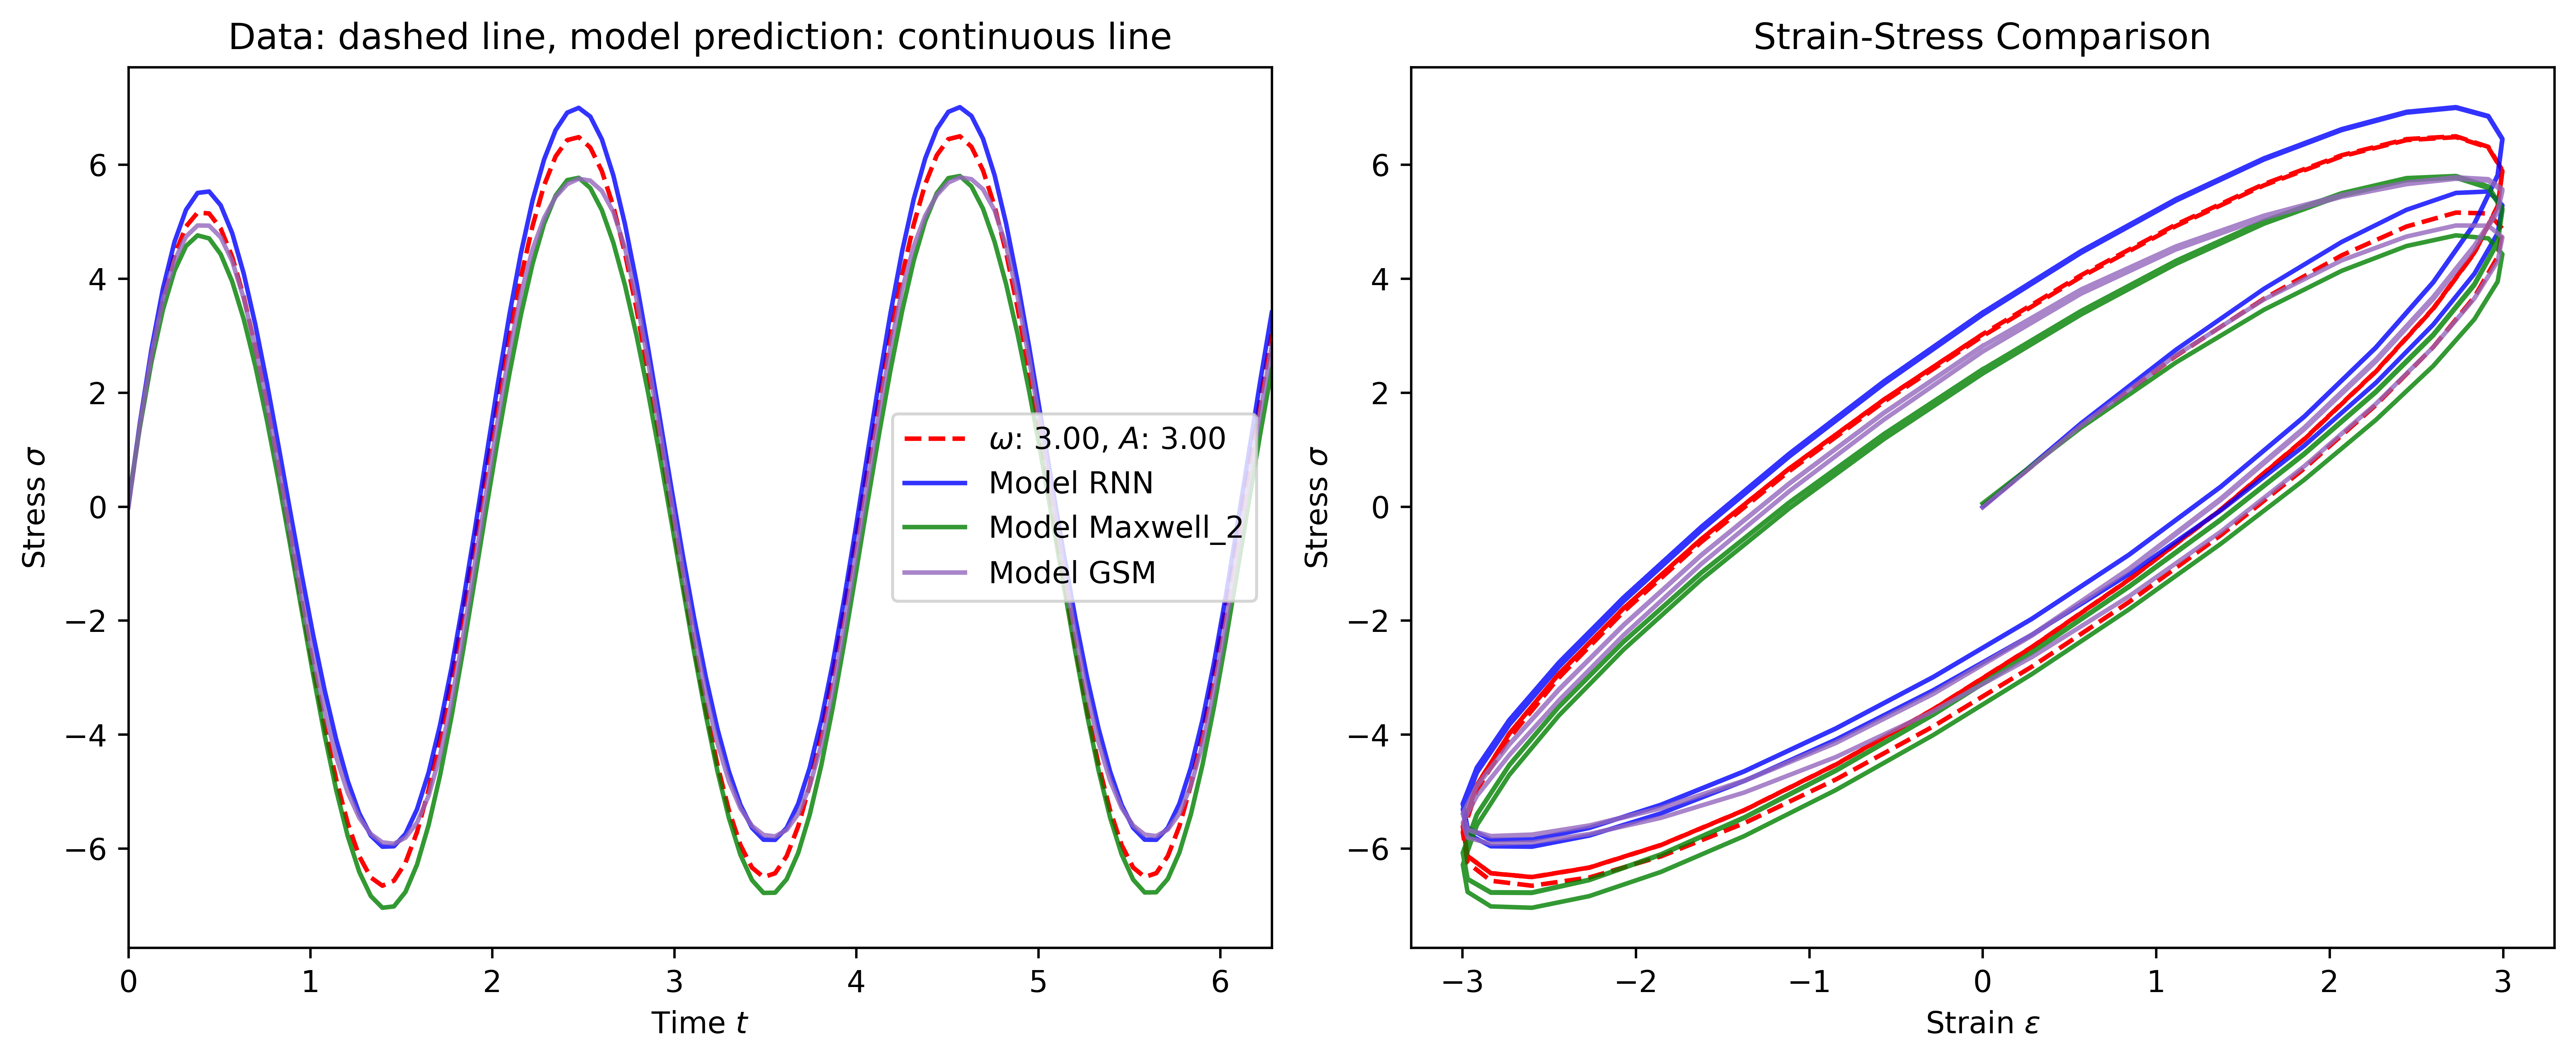

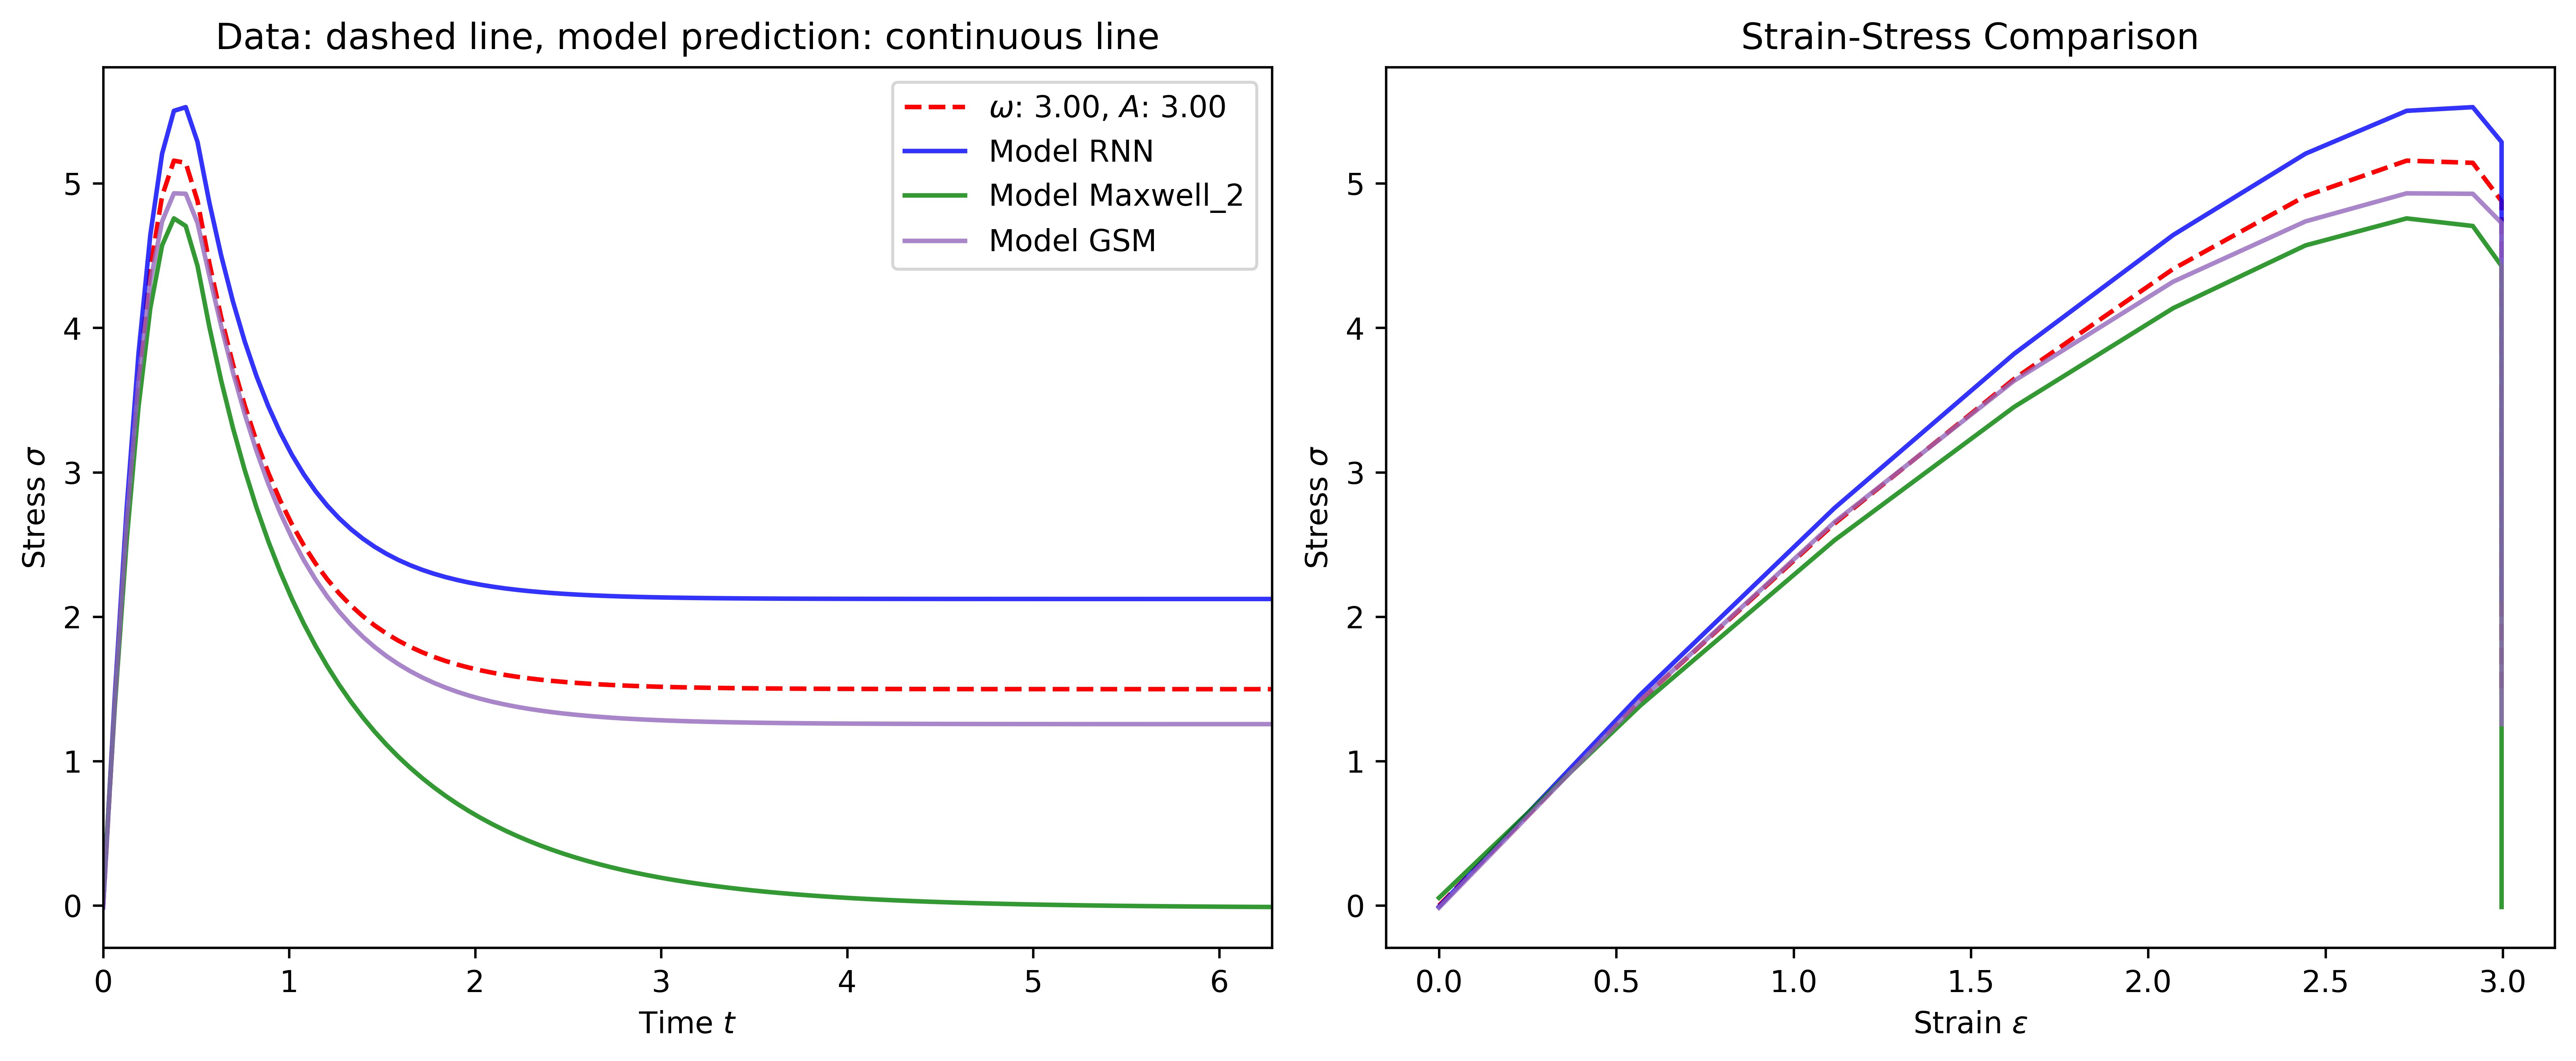

In [58]:
As = [3]
omegas = [3]

eps_harmonic, eps_dot_harmonic, sig_harmonic, dts_harmonic = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)
sig_m_rnn = model_Rnn([eps_harmonic, dts_harmonic])
sig_m_maxwell_2 = model_maxwell_2([eps_harmonic, dts_harmonic])
sig_m_gsm = model_gsm([eps_harmonic, dts_harmonic])
plot_model_pred(eps_harmonic, sig_harmonic, sig_m_rnn, sig_m_maxwell_2, sig_m_gsm, omegas, As)



eps_relaxation, eps_dot_relaxation, sig_relaxation, dts_relaxation = ld.generate_data_relaxation(E_infty, E, eta, n, omegas, As)
sig_m_rnn = model_Rnn([eps_relaxation, dts_relaxation])
sig_m_maxwell_2 = model_maxwell_2([eps_relaxation, dts_relaxation])
sig_m_gsm = model_gsm([eps_relaxation, dts_relaxation])
plot_model_pred(eps_relaxation, sig_relaxation, sig_m_rnn, sig_m_maxwell_2, sig_m_gsm, omegas, As)

